<a href="https://colab.research.google.com/github/vrmusketeers/FYP-2021/blob/master/notebooks/neural_net/Inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/Shareddrives/Final Project/FmriTrainTestData/Inception-Data/Output.zip' -d '/content/drive/Shareddrives/Final Project/FmriTrainTestData/Inception-Data/'

In [2]:
!rm -rf '/content/drive/Shareddrives/Final Project/FmriTrainTestData/Inception-Data/Output/__MACOSX'
!rm -rf '/content/drive/Shareddrives/Final Project/FmriTrainTestData/Inception-Data/Output/train/.ipynb_checkpoints'
!rm -rf '/content/drive/Shareddrives/Final Project/FmriTrainTestData/Inception-Data/Output/test/.ipynb_checkpoints'
!rm -rf '/content/drive/Shareddrives/Final Project/FmriTrainTestData/Inception-Data/Output/val/.ipynb_checkpoints'

In [3]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [4]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [5]:
train_generator = train_datagen.flow_from_directory('/content/drive/Shareddrives/Final Project/FmriTrainTestData/Inception-Data/Output/train', batch_size = 20, class_mode = 'binary', target_size = (150, 150))
test_generator = test_datagen.flow_from_directory('/content/drive/Shareddrives/Final Project/FmriTrainTestData/Inception-Data/Output/test', batch_size = 20, class_mode = 'binary', target_size = (150, 150))
validation_generator = test_datagen.flow_from_directory('/content/drive/Shareddrives/Final Project/FmriTrainTestData/Inception-Data/Output/val', batch_size = 20, class_mode = 'binary', target_size = (150, 150))

Found 6968 images belonging to 2 classes.
Found 871 images belonging to 2 classes.
Found 871 images belonging to 2 classes.


# Modeling and Architecture
We downloaded the inception net model and then used it for the finetuning tasks
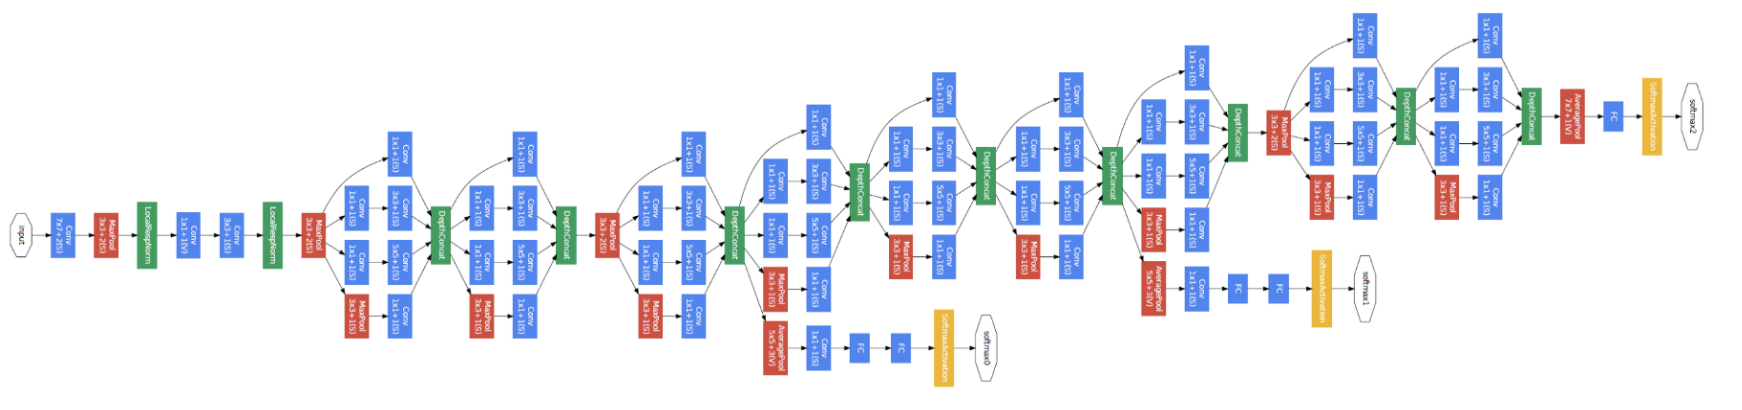

## Simplified Architecture

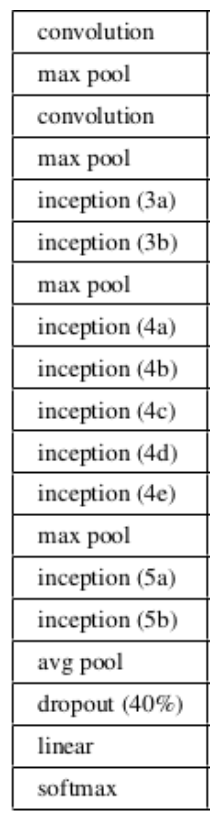

In [6]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

87924736/87910968 [==============================] - 1s 0us/step


In [7]:
for layer in base_model.layers:
    layer.trainable = False

## Compile and Fit

In [8]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.15)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [9]:
inc_history = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 30, epochs = 10)

Epoch 1/10
30/30 [==============================] - 541s 18s/step - loss: 1.2484 - acc: 0.4950 - val_loss: 0.7110 - val_acc: 0.5304
Epoch 2/10
30/30 [==============================] - 250s 8s/step - loss: 0.8186 - acc: 0.4783 - val_loss: 0.7258 - val_acc: 0.4856
Epoch 3/10
30/30 [==============================] - 221s 7s/step - loss: 0.7606 - acc: 0.5517 - val_loss: 0.7162 - val_acc: 0.4948
Epoch 4/10
30/30 [==============================] - 209s 7s/step - loss: 0.7797 - acc: 0.4733 - val_loss: 0.6977 - val_acc: 0.5121
Epoch 5/10
30/30 [==============================] - 195s 7s/step - loss: 0.7634 - acc: 0.4700 - val_loss: 0.7081 - val_acc: 0.4902
Epoch 6/10
30/30 [==============================] - 167s 6s/step - loss: 0.7460 - acc: 0.5117 - val_loss: 0.7239 - val_acc: 0.5029
Epoch 7/10
30/30 [==============================] - 152s 5s/step - loss: 0.7308 - acc: 0.5283 - val_loss: 0.7952 - val_acc: 0.4696
Epoch 8/10
30/30 [==============================] - 136s 4s/step - loss: 0.7319 - 

In [10]:
print(inc_history.history)

{'loss': [1.2483530044555664, 0.8186485767364502, 0.7605698704719543, 0.779734194278717, 0.7633695602416992, 0.7460110187530518, 0.7308269143104553, 0.7319438457489014, 0.7325303554534912, 0.7206225395202637], 'acc': [0.4950000047683716, 0.47833332419395447, 0.5516666769981384, 0.47333332896232605, 0.4699999988079071, 0.5116666555404663, 0.528333306312561, 0.5049999952316284, 0.49166667461395264, 0.5083333253860474], 'val_loss': [0.7109772562980652, 0.7258403897285461, 0.7162065505981445, 0.6977028846740723, 0.7081296443939209, 0.7239112854003906, 0.7951755523681641, 0.7034346461296082, 0.7025305032730103, 0.6938872337341309], 'val_acc': [0.5304247736930847, 0.4856486916542053, 0.4948335289955139, 0.5120550990104675, 0.4902411103248596, 0.5028702616691589, 0.4695751965045929, 0.5017221570014954, 0.4948335289955139, 0.5235361456871033]}


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


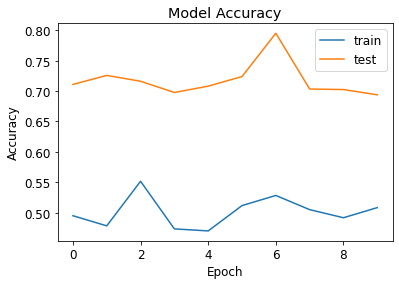

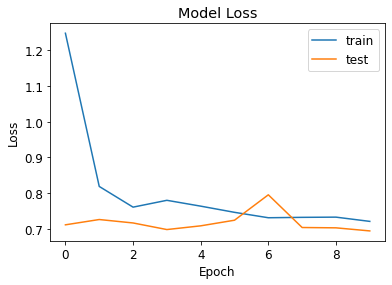

In [21]:
# summarize history for accuracy
plt.plot(inc_history.history['acc'])
plt.plot(inc_history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# summarize history for loss
plt.plot(inc_history.history['loss'])
plt.plot(inc_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [22]:
probabilities = model.predict_generator(generator=validation_generator)
y_true = test_generator.classes
y_pred = probabilities > 0.5
font = {
'family': 'Times New Roman',
'size': 12
}
plt.rc('font', **font)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


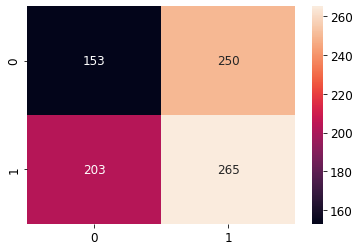

In [20]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_true, y_pred)
# plot_confusion_matrix(conf_mat=mat, figsize=(8, 8), show_normed=False)

#plot_confusion_matrix(model, y_true, y_pred)
f = sns.heatmap(mat, annot=True, fmt='d')